# Single stock analysis example in pyfolio

Here's a simple example where we produce a set of plots, called a tear sheet, for a stock.

## Import pyfolio

In [1]:
%matplotlib inline
import pyfolio as pf

## Fetch the daily returns for a stock

In [2]:
stock_rets = pf.utils.get_symbol_rets('FB')

## Create a full tear sheet for the single stock
This will show charts about returns and shock events.

Entire data start date: 2012-05-21 00:00:00+00:00
Entire data end date: 2015-08-04 00:00:00+00:00


Backtest Months: 38
                   Backtest
sortino_ratio          1.65
omega_ratio            1.18
max_drawdown          -0.48
calmar_ratio           0.79
annual_return          0.38
stability              0.87
sharpe_ratio           0.85
annual_volatility      0.44
alpha                  0.20
beta                   0.98

Worst Drawdown Periods
   net drawdown in %                  peak date                valley date  \
0              47.90  2012-05-21 00:00:00+00:00  2012-09-04 00:00:00+00:00   
1              22.06  2014-03-10 00:00:00+00:00  2014-04-28 00:00:00+00:00   
2              17.34  2013-10-18 00:00:00+00:00  2013-11-25 00:00:00+00:00   
4               9.21  2014-10-28 00:00:00+00:00  2014-11-19 00:00:00+00:00   
3               9.20  2015-03-24 00:00:00+00:00  2015-05-12 00:00:00+00:00   

               recovery date duration  
0  2013-07-25 00:00:00+00:00      309  

/opt/miniconda/lib/python2.7/site-packages/matplotlib/cbook.py:137: MatplotlibDeprecationWarning: The "loc" positional argument to legend is deprecated. Please use the "loc" keyword instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


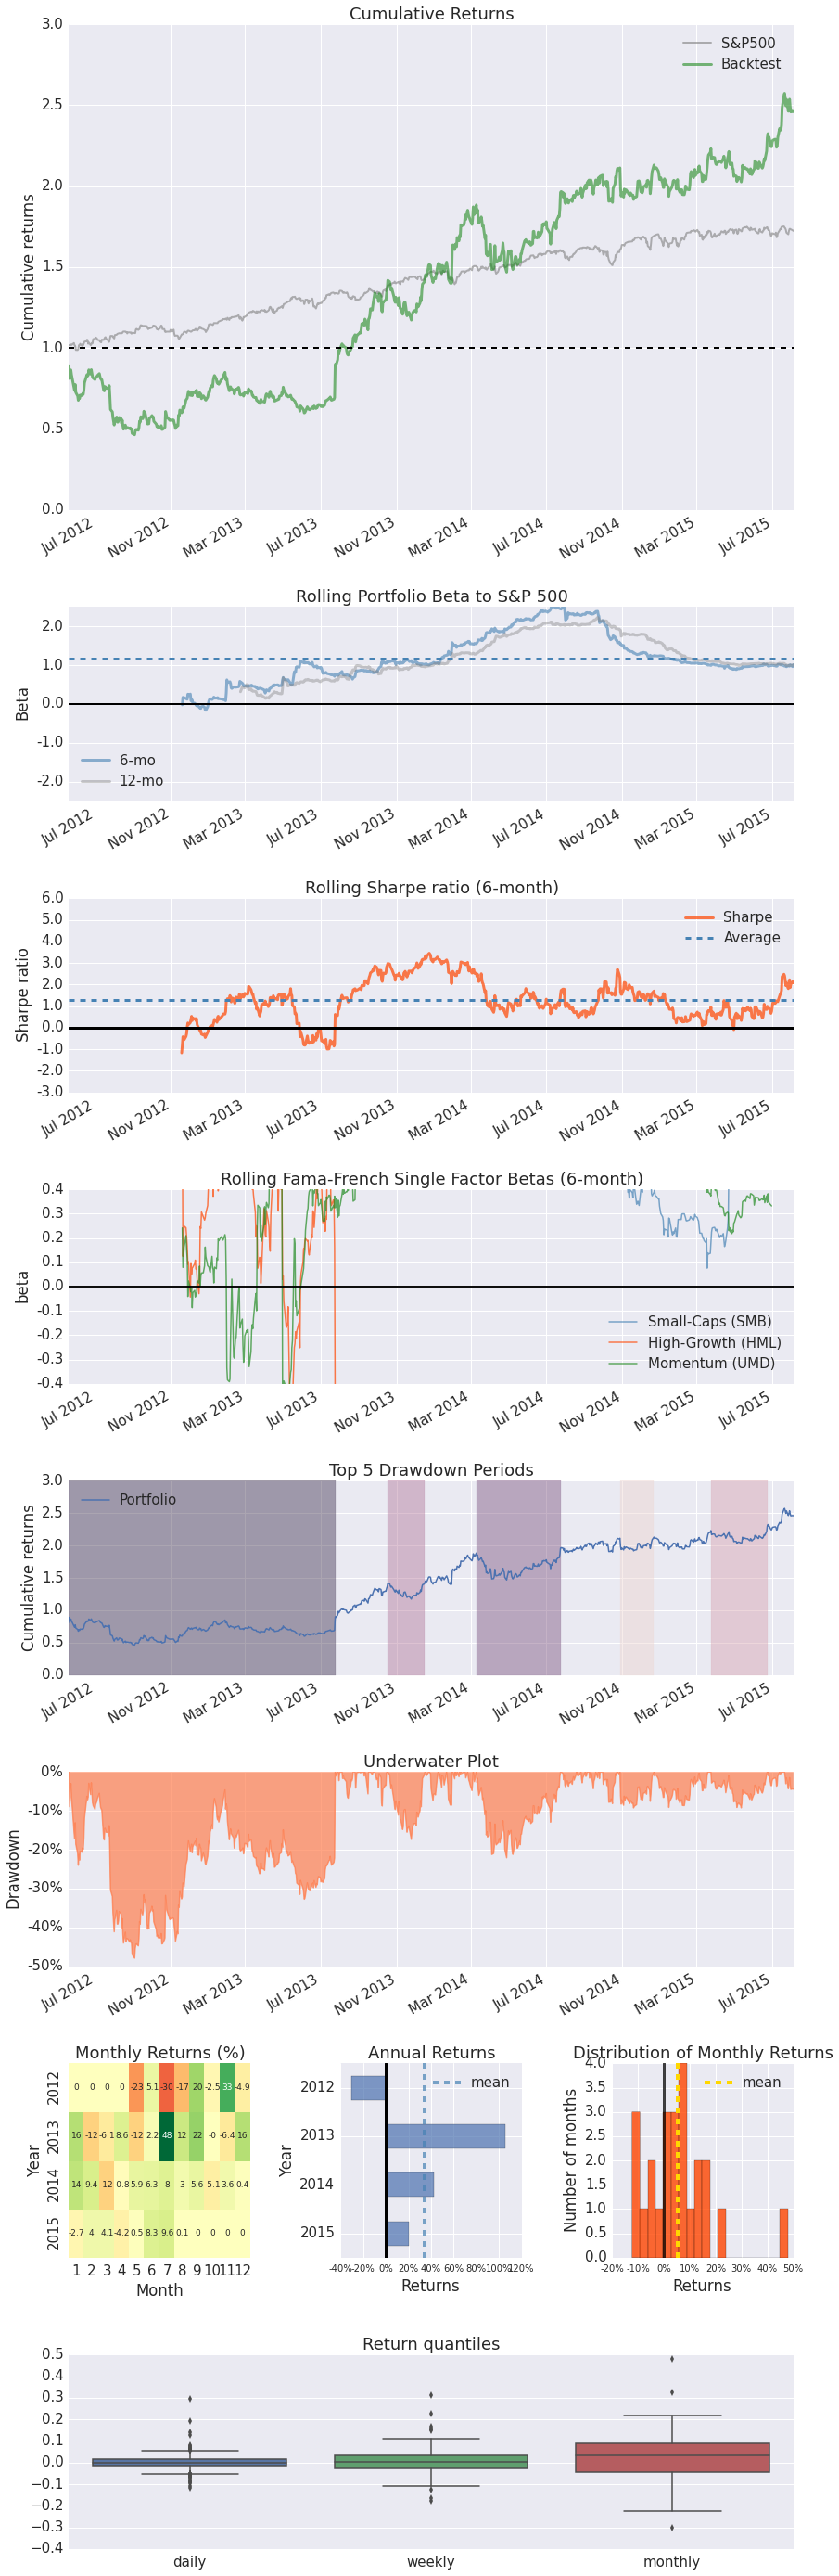

In [3]:
pf.create_returns_tear_sheet(stock_rets)

## Create a full tear sheet for an equal-weight portfolio of:
* Long SPY
* Short QQQ
* Long GLD
* Long TLT

Additionally, we set the live start date as an example.

In [2]:
stock_rets_SPY = pf.utils.get_symbol_rets('SPY')
stock_rets_QQQ = pf.utils.get_symbol_rets('QQQ')
stock_rets_GLD = pf.utils.get_symbol_rets('GLD')
stock_rets_TLT = pf.utils.get_symbol_rets('TLT')

In [9]:
import pandas as pd
portfolio_4_assets_rets = pd.DataFrame([stock_rets_SPY, 
                                        -1 * stock_rets_QQQ, 
                                        stock_rets_GLD, 
                                        stock_rets_TLT]).T.mean(axis='columns')

Entire data start date: 1993-02-01
Entire data end date: 2016-01-19


Out-of-Sample Months: 26
Backtest Months: 248
                         All history  Backtest  Out of sample
annual_return                   0.07      0.08          -0.01
annual_volatility               0.11      0.12           0.06
sharpe_ratio                    0.66      0.71          -0.17
calmar_ratio                    0.21      0.24          -0.13
stability_of_timeseries         0.92      0.93          -0.28
max_drawdown                   -0.33     -0.33          -0.09
omega_ratio                     1.13      1.14           0.97
sortino_ratio                   0.94      1.01          -0.23
skew                           -0.34     -0.35          -0.05
kurtosis                        9.65      9.01           0.44
information_ratio              -0.01     -0.01          -0.03
alpha                           0.07      0.08          -0.00
beta                            0.04      0.05          -0.15

Worst Drawdown 

/home/wiecki/miniconda3/lib/python3.4/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


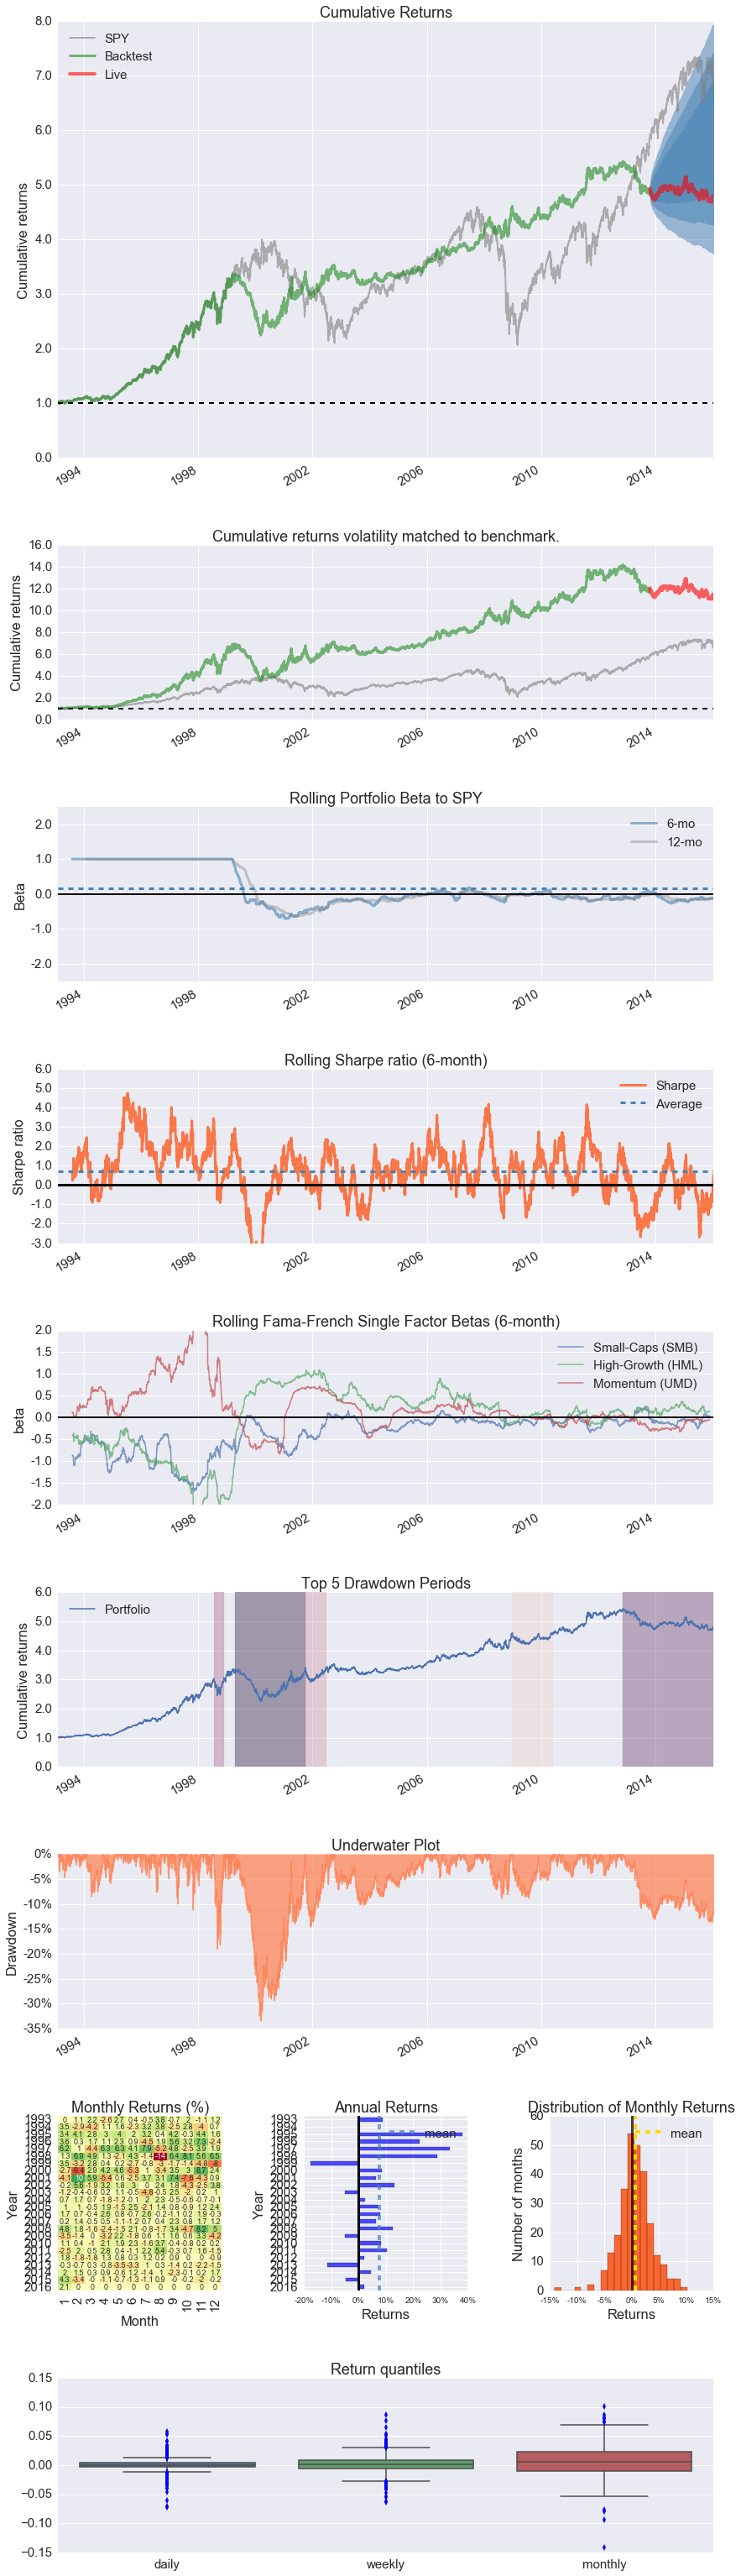


Stress Events
                                    mean    min    max
Dotcom                             0.001 -0.040  0.034
Lehmann                            0.001 -0.016  0.031
9/11                              -0.001 -0.029  0.016
US downgrade/European Debt Crisis  0.002 -0.018  0.015
Fukushima                          0.001 -0.006  0.007
US Housing                         0.000 -0.012  0.011
EZB IR Event                       0.000 -0.007  0.004
Aug07                              0.000 -0.006  0.005
Mar08                             -0.002 -0.016  0.007
Sept08                             0.002 -0.016  0.031
2009Q1                            -0.001 -0.012  0.015
2009Q2                            -0.000 -0.012  0.020
Flash Crash                        0.002 -0.009  0.015
Apr14                              0.000 -0.005  0.009
Oct14                             -0.000 -0.007  0.007
Fall2015                          -0.000 -0.011  0.009
Low Volatility Bull Market         0.000 -0.019  0

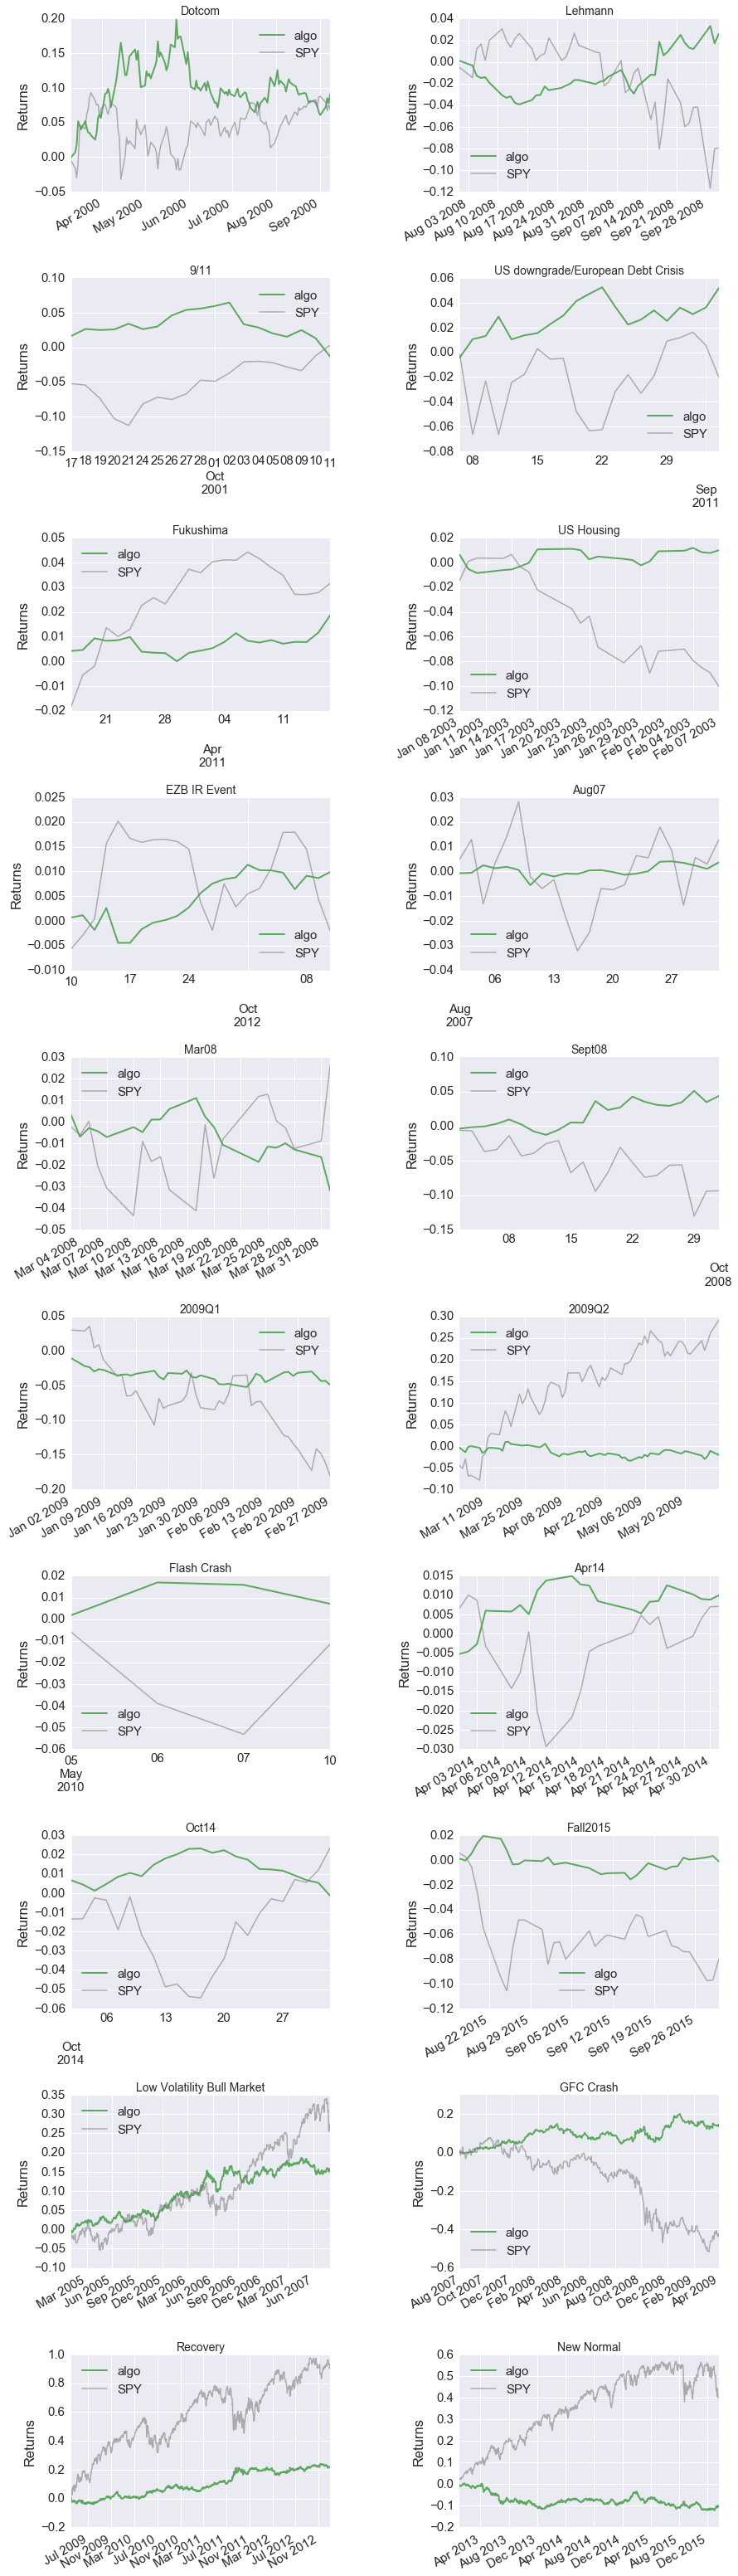

In [10]:
pf.create_full_tear_sheet(portfolio_4_assets_rets, live_start_date='2013-10-22')